<a href="https://colab.research.google.com/github/blajiness/CHE_7530-Assignments/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3
Instructions: Please work through this notebook. Anything in red requires an answer in a code and/or text cell, as indicated. Please leave all of the text I have written; I have arranged the notebook so that I can easily navigate to your answers and skip my own explanations.

<font size=5> General structure of Assignment  
<font size=3> This assignment is split into roughly three parts, structured as below.  
<font size=4><u> Peak finding and Smoothing</u>  
<font size=3>In this section, you will experiment with how different parameters fed into find_peaks and the Savitzky-Golay filter impact the physical meaning of your data. This experimentation is non-exhaustive; it might be helpful to keep the code and test it for your own experimental data down the road. You will also be asked to look at the documentation and explain the difference in algorithms for peak finding.  
<font size=4><u> X-ray Scattering Instrumentation </u>  
<font size=3> Here, you will do some self-guided testing of sources of peak broadening and experimental geometries that are used for different substances. These will transition into the non-crystalline X-ray scattering that we will cover next week.  
<font size=4><u> Automatic Peak Finding </u>  
<font size=3> You will put together some of your peak finding routines (focusing on peak positions only) with a set of published data.


## Imports and GitHub Access

In [1]:
# the standard cell
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
!git clone https://github.com/cbishop4/MSE7530.git

Cloning into 'MSE7530'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 228 (delta 39), reused 4 (delta 4), pack-reused 165 (from 1)
Receiving objects: 100% (228/228), 9.14 MiB | 22.77 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [3]:
from scipy import signal

## <font color='blue'>New Python Concept - Input cells
To make the class less reliant on programming, I'm trying to adopt some tools to make this easier. The first of these is "input cells". When you run these, a box will pop up and you can enter the value. Try the example below:

In [4]:
a = int(input('Enter a value to multiply by 3: '))
result = a*3
print(result)

Enter a value to multiply by 3: 3
9


When you run the cell, it will pause the execution and wait for you to put in a value in a box that pops up in the output area. Type the value in the box and hit "enter", and the cell will continue running. Note that above I have int(input()); this means that the input needs to be an integer. Alternatively, if I specify the type as "float", it will accept either an integer or a decimal number (and treat it as a decimal)

In [5]:
a = float(input('Enter a value to multiply by 3: '))
result = a*3
print(result)

Enter a value to multiply by 3: 3
9.0


This can be used for anything; this way, rather than having to insert code directly into a line, you can enter it and have it automatically populate. **You must turn in your assignment with all of your outputs recorded for this to work, because if I hit "run", I would have to put in the same inputs you did.**

## Peak Finding and Smoothing

### <font color='blue'>Additional find_peaks arguments:
<font size=4> Many Python functions/modules have many arguments which are default specified. As an example, here is what the documentation for "find_peaks" has:

```
find_peaks(x, height=None, threshold=None, distance=None, prominence=None,
width=None, wlen=None, rel_height=0.5, plateau_size=None)
```
<font size=4>The function find_peaks has 9 arguments. However, only one argument **needs** to be passed, which is the array on which to find peaks. The rest of the arguments all have **default values** which are set in the definition of the function with = signs. If nothing is entered for these, the code will run whatever the default is. (Note that arguments are often called parameters interchangeably)

For the remainder of these exercises, we will use smoother experimental data where these will make more sense.

In [6]:
# The data we worked with Monday/you're using in your assignment (not background subtracted)
file_PS = '/content/MSE7530/sampledata/Polystyrene.csv'
file_bg = '/content/MSE7530/sampledata/BackgroundSpectrum.csv'
PS_loaded = pd.read_csv(file_PS,header=0)
bg_loaded = pd.read_csv(file_bg,header=0)

(3201.306, 470.5533)

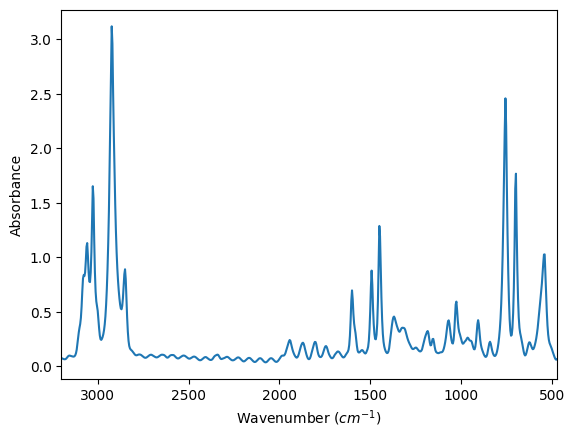

In [7]:
finalspec = -np.log10(PS_loaded['Intensity']/bg_loaded['Intensity'])
wns = PS_loaded['Wavenumber']
plt.plot(wns,finalspec)
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Absorbance')
plt.xlim(np.max(wns),np.min(wns)) # switching wavenumber display to standard convention


We now have something more reasonable to find peaks on, where things will make a difference.

Text(0, 0.5, 'Intensity')

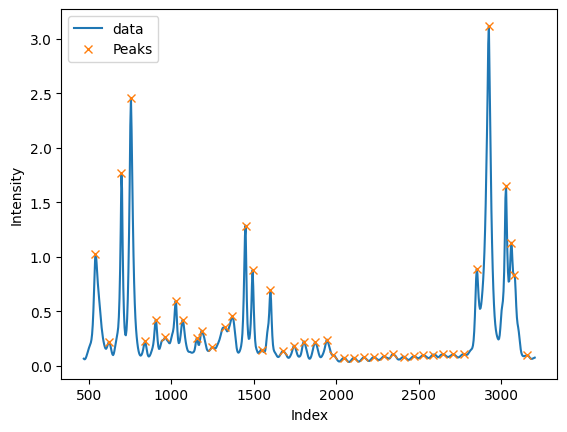

In [8]:
plt.plot(wns,finalspec,label='data')
peak_tuple = signal.find_peaks(finalspec)
plt.plot(wns[peak_tuple[0]], finalspec[peak_tuple[0]], 'x',label='Peaks')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Intensity')

#### <font color='blue'>"Distance" parameter  
<font color='red'>1. Play around with the below distance parameters until you settle on three that seem to show meaningful difference in their behavior. Credit on this portion will be given for the output graphs with your 3 input distance parameters. All you have to do is put 3 different parameters in the boxes, so **you must have the output showing when you submit the assignment.**

Distance 1 to test: 25
Distance 2 to test: 50
Distance 3 to test: 100


(3201.306, 470.5533)

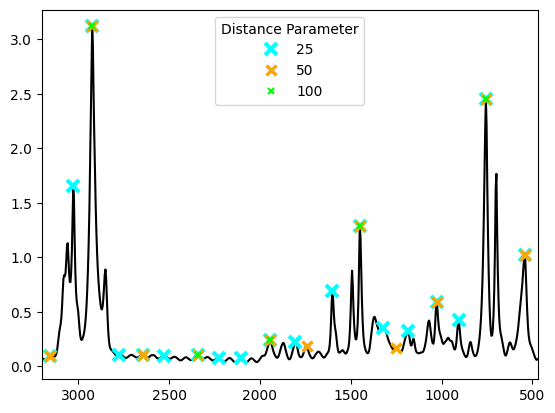

In [9]:
plt.plot(wns,finalspec,color='k')
d = int(input('Distance 1 to test: '))
peak_locs = signal.find_peaks(finalspec,distance=d)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=d,markersize=9,markeredgewidth=3,color='cyan')
d = int(input('Distance 2 to test: '))
peak_locs = signal.find_peaks(finalspec,distance=d)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=d,markersize=7,markeredgewidth=2.5,color='orange')
d = int(input('Distance 3 to test: '))
peak_locs = signal.find_peaks(finalspec,distance=d)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=d,markersize=5,markeredgewidth=1.5,color='lime')
plt.legend(title='Distance Parameter')
plt.xlim(np.max(wns),np.min(wns))

<font color='red'> 2. Is the distance parameter a good parameter to change to filter for meaningful peaks in this system? Why or why not? You may find it helpful to refer to the documentation to learn how this algorithm works in plain terms.

<font color='red'> **Your answer here**

I believe yes it is a fairly good fliter for certain types of data, Ifeel like it can most effectivly be used may have messy noise but still have general distict peaks at far distances from each other in the data.

#### <font color='blue'>Threshold Parameter
<font color='red'>3. Play around with the below threshold parameters until you settle on three that seem to show meaningful difference in their behavior. Credit on this portion will be given for the output graph with your 3 input distance parameters. All you have to do is put 3 different parameters in the boxes, so **you must have the output showing when you submit the assignment.**

Threshold 1 to test: 0.1
Threshold 2 to test: 0.01
Threshold 3 to test: 0.001


(3201.306, 470.5533)

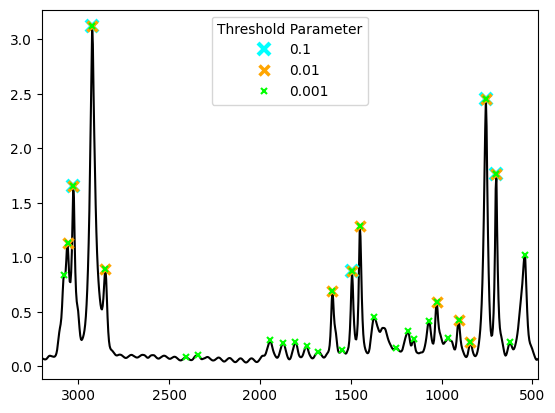

In [21]:
plt.plot(wns,finalspec,color='k')
t = float(input('Threshold 1 to test: '))
peak_locs = signal.find_peaks(finalspec,threshold=t)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=t,markersize=9,markeredgewidth=3,color='cyan')
t = float(input('Threshold 2 to test: '))
peak_locs = signal.find_peaks(finalspec,threshold=t)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=t,markersize=7,markeredgewidth=2.5,color='orange')
t = float(input('Threshold 3 to test: '))
peak_locs = signal.find_peaks(finalspec,threshold=t)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=t,markersize=5,markeredgewidth=1.5,color='lime')
plt.legend(title='Threshold Parameter')
plt.xlim(np.max(wns),np.min(wns))

#### <font color='blue'>Prominence Parameter
<font color='red'>4. Play around with the below prominence parameters until you settle on three that seem to show meaningful difference in their behavior. Credit on this portion will be given for the output graph with your 3 input distance parameters. All you have to do is put 3 different parameters in the boxes, so **you must have the output showing when you submit the assignment.**

Prominence 1 to test: 0.25
Prominence 2 to test: .5
Prominence 3 to test: 0.75


(3201.306, 470.5533)

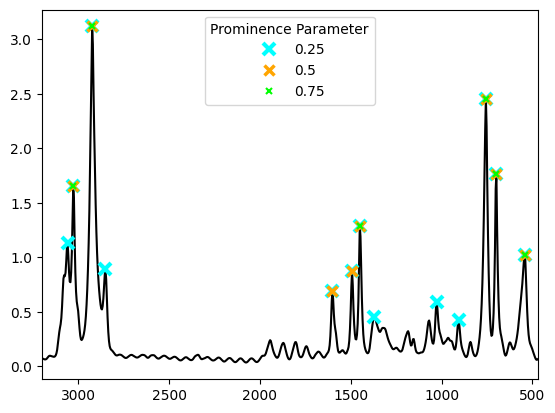

In [11]:
plt.plot(wns,finalspec,color='k')
p = float(input('Prominence 1 to test: '))
peak_locs = signal.find_peaks(finalspec,prominence=p)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=p,markersize=9,markeredgewidth=3,color='cyan')
p = float(input('Prominence 2 to test: '))
peak_locs = signal.find_peaks(finalspec,prominence=p)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=p,markersize=7,markeredgewidth=2.5,color='orange')
p = float(input('Prominence 3 to test: '))
peak_locs = signal.find_peaks(finalspec,prominence=p)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=p,markersize=5,markeredgewidth=1.5,color='lime')
plt.legend(title='Prominence Parameter')
plt.xlim(np.max(wns),np.min(wns))

#### <font color='blue'>Width Parameter
<font color='red'>5. Play around with the below Width parameters until you settle on three that seem to show meaningful difference in their behavior. Credit on this portion will be given for the output graph with your 3 input distance parameters. All you have to do is put 3 different parameters in the boxes, so **you must have the output showing when you submit the assignment.**

Width 1 to test: 1
Width 2 to test: 10
Width 3 to test: 50


(3201.306, 470.5533)

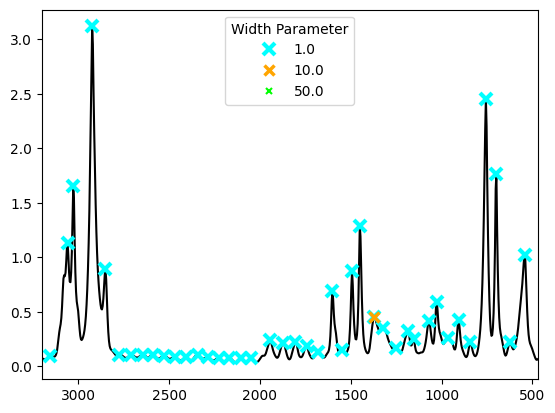

In [20]:
plt.plot(wns,finalspec,color='k')
w = float(input('Width 1 to test: '))
peak_locs = signal.find_peaks(finalspec,width=w)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=w,markersize=9,markeredgewidth=3,color='cyan')
w = float(input('Width 2 to test: '))
peak_locs = signal.find_peaks(finalspec,width=w)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=w,markersize=7,markeredgewidth=2.5,color='orange')
w = float(input('Width 3 to test: '))
peak_locs = signal.find_peaks(finalspec,width=w)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',label=w,markersize=5,markeredgewidth=1.5,color='lime')
plt.legend(title='Width Parameter')
plt.xlim(np.max(wns),np.min(wns))

### <font color='red'> Putting it together - finding the right combination
<font color='red'>6. Experiment with different combinations of parameters for find_peaks. Which ones seem to be the most useful? Which are not useful for this data set, and why? When you're all done, do you think you've done a sufficient job fitting the dataset, or would you want to look for another tool? Expected components of this are the correct graph below, with a text answer in the red bolded cell where it currently says "Your answer here"

Here I have not used the input cells because they're difficult to implement with the flexibility I want you to have for this exercise. Enter the variable you want on each line; if you do not want to use a variable, type None (which should show up blue).

Text(0.5, 1.0, 'Width = None, Prominence = 0.5, Height = 0.5, Threshold = None')

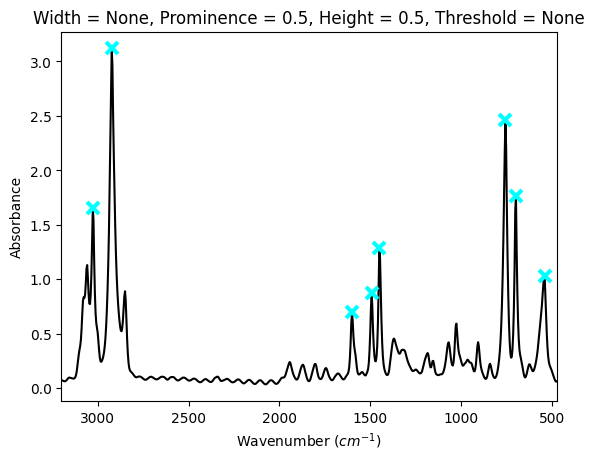

In [23]:
plt.plot(wns,finalspec,color='k')
w = None # edit this
p = 0.5 # edit this
h = 0.5 # edit this
t = None # edit this
peak_locs = signal.find_peaks(finalspec,width=w,prominence=p,height=h,threshold=t)
plt.plot(wns[peak_locs[0]], finalspec[peak_locs[0]], 'x',markersize=9,markeredgewidth=3,color='cyan')
plt.xlabel('Wavenumber $(cm^{-1})$')
plt.ylabel('Absorbance')
plt.xlim(np.max(wns),np.min(wns))
plt.title(f'Width = {w}, Prominence = {p}, Height = {h}, Threshold = {t}')

<font color='red'> **Your answer here**

I think height and prominence are the most useful for this data height allowing you to basically have a cutoff filter noise spikes below a certian intensity then prominence further filtering peaks that might arise from noise in sample being close to a true peak. Meanwhile theshold and width are not as useful. Width because its based on a maximum filter old the obviously useful peaks. Theshold on the other is not great for this data set most likely due to the data set being too dense for how the function works.

<font color='red'>7. Think about if you were to use find_peaks to automatically match new spectra to literature values. What difficulties might you encounter?

<font color='red'> **Your answer here**

It might not be the best idea because with how broad find peaks can it could accidently add or remove important peaks that could one mimic another wrong literature value or two miss the correct literature value

### Pre-processing: Smoothing
<font size=4>One issue with find_peaks is that it only looks quite locally for maxima. One approach to addressing this is to smooth the data. We will work here with a Savitzky-Golay Filter

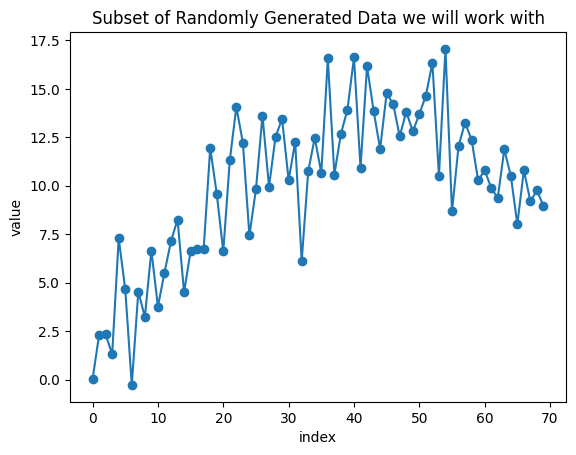

In [14]:
np.random.seed(42)  # for reproducibility
x = np.linspace(0, 10, 1000)
array1D = (np.sin(x * 3) + 0.5 * np.sin(x * 5) + 0.2 * np.random.randn(len(x))) * 10
extra_zoom = array1D[230:300] # takes only the first 30 points of the array
plt.plot(extra_zoom,'-o')
plt.xlabel('index')
plt.ylabel('value')
plt.title('Subset of Randomly Generated Data we will work with')
plt.show()

Text(0, 0.5, 'value')

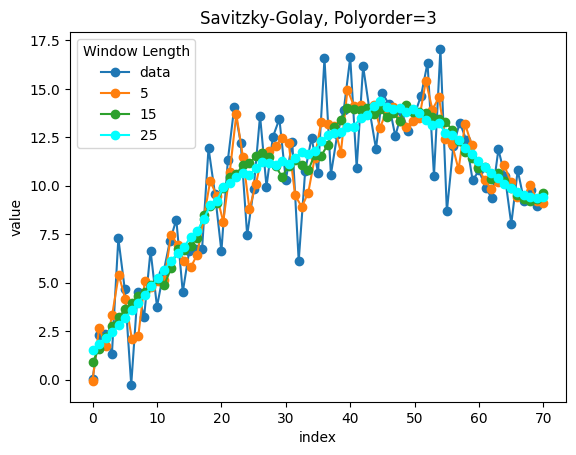

In [15]:
# changing window length
sg_smoothed1 = signal.savgol_filter(extra_zoom,window_length=5,polyorder=3)
sg_smoothed2 = signal.savgol_filter(extra_zoom,window_length=15,polyorder=3)
sg_smoothed3 = signal.savgol_filter(extra_zoom,window_length=25,polyorder=3)

fig, ax = plt.subplots()


ax.plot(extra_zoom,'-o',label='data')
index_vals = np.linspace(0,len(sg_smoothed1),len(sg_smoothed1))
ax.plot(index_vals,sg_smoothed1,'-o',label='5')
ax.plot(index_vals,sg_smoothed2,'-o',label='15')
ax.plot(index_vals,sg_smoothed3,'-o',label='25',color='cyan')


ax.set_title('Savitzky-Golay, Polyorder=3')
ax.legend(title='Window Length')
ax.set_xlabel('index')
ax.set_ylabel('value')

<font color='red'>
8. Your turn: experiment with polynomial order. I have put in input cells; you will first be prompted to choose a constant polynomial order for the first three curves/left graph, and then 3 separate window lengths. Please choose 3 window lengths that show meaningful variation.  
For the second three curves/right graph, you will do the opposite; first choose one window length to keep constant through the 3, and then use the input cells to choose different polynomial orders.  
You will be graded on the two graphs you produce.

Constant Polynomial Order for Set 1 : 3
Window Length 1 for Set 1 : 4
Window Length 2 for Set 1 : 40
Window Length 3 for Set 1 : 400
Constant Window Length for Set 1 : 400
Polynomial Order 1 for Set 2 : 1
Polynomial Order 2 for Set 2 : 3
Polynomial Order 3 for Set 2 : 6


AttributeError: 'set' object has no attribute 'items'

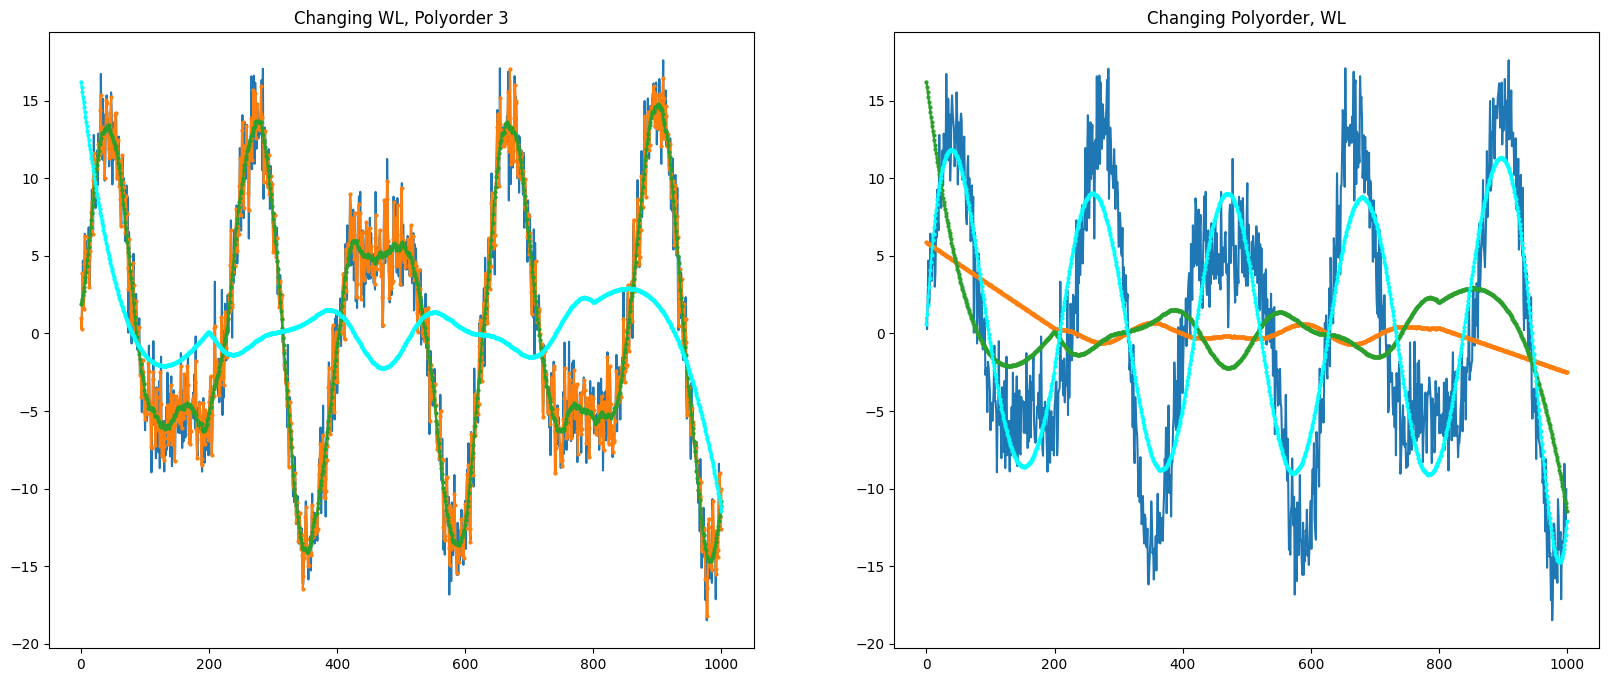

In [44]:
porder = int(input('Constant Polynomial Order for Set 1 : '))
wl1 = int(input('Window Length 1 for Set 1 : '))
wl2 = int(input('Window Length 2 for Set 1 : '))
wl3 = int(input('Window Length 3 for Set 1 : '))
sg_smoothed1 = signal.savgol_filter(array1D,window_length=wl1,polyorder=porder)
sg_smoothed2 = signal.savgol_filter(array1D,window_length=wl2,polyorder=porder)
sg_smoothed3 = signal.savgol_filter(array1D,window_length=wl3,polyorder=porder)

fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(array1D,label='data')
index_vals = np.linspace(0,len(sg_smoothed1),len(sg_smoothed1))
ax[0].plot(index_vals,sg_smoothed1,'-o',markersize=2,label='5')
ax[0].plot(index_vals,sg_smoothed2,'-o',markersize=2,label='15')
ax[0].plot(index_vals,sg_smoothed3,'-o',markersize=2,label='25',color='cyan')

wl_const = int(input('Constant Window Length for Set 1 : '))
p1 = int(input('Polynomial Order 1 for Set 2 : '))
p2 = int(input('Polynomial Order 2 for Set 2 : '))
p3 = int(input('Polynomial Order 3 for Set 2 : '))
sg_smoothed1 = signal.savgol_filter(array1D,window_length=wl_const,polyorder=p1)
sg_smoothed2 = signal.savgol_filter(array1D,window_length=wl_const,polyorder=p2)
sg_smoothed3 = signal.savgol_filter(array1D,window_length=wl_const,polyorder=p3)

ax[1].plot(array1D,label='data')
index_vals = np.linspace(0,len(sg_smoothed1),len(sg_smoothed1))
ax[1].plot(index_vals,sg_smoothed1,'-o',markersize=2,label='1')
ax[1].plot(index_vals,sg_smoothed2,'-o',markersize=2,label='2')
ax[1].plot(index_vals,sg_smoothed3,'-o',markersize=2,label='3',color='cyan')



ax[0].set_title(f'Changing WL, Polyorder {porder}')
ax[1].set_title('Changing Polyorder, WL 15')
ax[0].legend()
ax[0].legend(title='Window Length')
ax[1].legend(title='Poly Order')
for a in ax:
  a.set_xlabel('index')
  a.set_ylabel('value')

<font color='red'> **Questions about changing the window length**  
9. Did you identify an optimal window length? What makes it seem like an optimal window length?  
10. At what sections of the data does window length seem to make the most difference? Are there any features in the data in which the results would change dramatically with changing window length if you were trying to find peaks?

<font color='red'> **Your answer here**

9. The Opitmal window length seems fall between 10-50, this seems to capture all the curves features with including too much noise

10.

<font color='red'>**Question about changing the Polynomial Order**

<font color='red'> <font size=3>
11. Does polynomial order seem to make much difference? Think about the shape of different polynomials (in the lecture slides from Monday 9/22); can you explain why or why not?  

<font color='red'> **Your answer here**

## X-ray Scattering Instrumentation
In class, we learned about the fundamental principles of X-ray scattering. In practice, there are many aspects of the geometry that we did not go over in detail. In this section, you will think about **instrumental requirements to measure what you want to**.

<font size=4><font color='blue'> The following questions (#12 through 16, except 14) all require calculations. You may do these either by hand or in this Jupyter Notebook, with no difference in credit. If you do them by hand, please insert a .png/.jpg in each cell, along with any text explanation required to answer the question. Question 14 requires you to write a user-defined function in Python.

### Instrumental and Experimental Broadening

In class we briefly discussed the Scherrer equation for peak broadening,  
<font size=5> $ \tau = \frac{K \lambda}{\beta cos \theta} $  
<font size=3> Where $\tau$ is the mean size of nanocrystallites. For the following questions, assume that the X-ray wavelength is $1.54 Å$.  

<font color='red'>12. $\beta$, the FWHM of the peak, must be corrected for instrumental broadening before being used. Instrumental broadening is caused by spread in X-ray wavelength (bandwidth). Assume that the bandwidth of your source is 2 eV. What is the broadening in q caused by this bandwidth?

<font color='red'> **Your answer here**

In [ ]:
# CODE HERE if you are solving this question by Python

<font color='red'>13. Assume that the resolution of your measurement is $2\theta = 0.2°$, and that you have a perfectly monochromatic beam. For a peak at $2\theta = 10 °$, how large must the nanocrystals be for the calculation to become meaningless?

<font color='red'><font color='red'> **Your answer here**

In [ ]:
# CODE HERE if you are solving this question by Python

### Experimental Geometries & Resolution

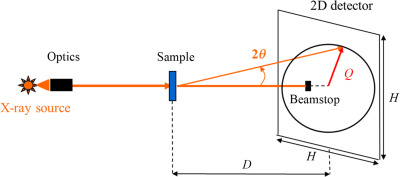

The above image defines the experimental geometry of an experiment, where $H$ is the height/width of a square 2D detector, $D$ is the sample-to-detector distance, $2\theta$ is the scattering angle, and $Q$ is the wavevector transfer.

<font color='red'> 14. Using the equation from class, write a user-defined function to convert $2\theta$ to $Q$.

In [ ]:
# YOUR CODE HERE
# def fname(args):
#   function body
#   return Q

Q values correspond to real-space distances in the sample by the equation  
<font size=5>$d = \frac{2\pi}{Q}$  
<font color='red'><font size=3> 15. Given a detector with $H = 10.0 ~cm$, what is the minimum sample-to-detector distance $D$ needed to probe features of size $50 nm$ with an X-ray energy of $10 keV$? You may compute this by hand and insert a .jpg/.png of your work here, or solve with Python and show your work in the code cell below.

<font color='red'><font color='red'> **Your answer here**

In [ ]:
# CODE HERE if you are solving this question by Python

Detectors are CCD arrays of pixels that register when they receive photons.    
  <font color='red'> 16. For a sample-to-detector distance $D$ of $10 cm$, what is the minimum square pixel size needed to resolve scattering with $2\theta=0.2 ° $ resolution? Assume an X-ray wavelength of $1.54 ~Å $ (the most common wavelength in lab sources).

<font color='red'><font color='red'> **Your answer here**

In [ ]:
# CODE HERE if you are solving this question by Python

## A Block Co-polymer system  
Data for this exercise was extracted using WebPlotDigitizer (https://automeris.io/) from Figure 3 of M.J. Rymaruk et. al., *Ang. Chem. Int. Ed.* 60, 23, 12955-12963 (2021). The paper can be found here:
https://onlinelibrary.wiley.com/doi/full/10.1002/anie.202101851  

<font size=4> First we will load the data into a dictionary of Pandas dataframes. I will do this for you. Note that the MSE7530 repository must be cloned for this to work; this was done at the beginning of the notebook. You are not expected to know this code (yet), but I will comment it with what I'm doing in case you're interested.

In [ ]:
import glob as glob # this is a module that lets you sort through files
flist = []; dfkeys = []
for f in glob.glob('/content/MSE7530/sampledata/HW3/*.csv'): # looks through every file
# in that folder with a "wildcard" operator *: it will hit each file that contains the rest of
# the file structure, with any text within the * section
  if f[-17] == '/': # the filenames have different numbers of digits for the temperatures,
  # so this checks if it's a 2-digit or a 3-digit temperature
    dfkeys.append(f[-16:-8]) # two-digit temperatures
  else:
    dfkeys.append(f[-17:-8]) # three-digit temperatures
  flist.append(f) # adds the file to a list of files


Putting all keys in a dictionary all_curves, initialized with {}, by inserting key-value pairs. Then, showing each curve on a single plot.

In [ ]:
all_curves = {}
fig, ax = plt.subplots()
for i in range(len(flist)):
  all_curves[dfkeys[i]] = pd.read_csv(flist[i],names=['logq','logI'])
  ax.plot(all_curves[dfkeys[i]]['logq'],all_curves[dfkeys[i]]['logI'],label=dfkeys[i])
ax.legend()
ax.set_xlabel('$log_{10}(q)$')
ax.set_ylabel('$log_{10}(I)$')

Splitting the plot into heating and cooling curves.

In [ ]:
all_curves = {}
fig, ax = plt.subplots(1,2,figsize=(10,4))
for i in range(len(flist)):
  all_curves[dfkeys[i]] = pd.read_csv(flist[i],names=['logq','logI'])
  if 'cool' in dfkeys[i]:
    ax[1].plot(all_curves[dfkeys[i]]['logq'],all_curves[dfkeys[i]]['logI'],label=dfkeys[i])
  else:
    ax[0].plot(all_curves[dfkeys[i]]['logq'],all_curves[dfkeys[i]]['logI'],label=dfkeys[i])
ax[0].legend(); ax[1].legend()
for a in ax:
  a.set_xlabel('$log_{10}(q)$')
  a.set_ylabel('$log_{10}(I)$')

ax[0].annotate("",xy=(-1.8,8),xytext=(-1.8,0),arrowprops=dict(arrowstyle="->"))
ax[1].annotate("",xy=(-1.8,11),xytext=(-1.8,1),arrowprops=dict(arrowstyle="->"))
ax[0].set_title('Heating Curves')
ax[1].set_title('Cooling Curves')

<font color='red'> 17. Using the same strategies as in lecture and in your above peak-finding, identify and annotate the peaks on each graph. You can use as much or as little smoothing and peak parameter adjustments as possible. You should visually verify that the peaks seem reasonable; you **may** use different parameters for each curve, and you **may** put each one on a different graph (to avoid needing to mess around with too much plotting code).  
Full credit on this part will be given for one, two, or seven graphs (depending how you want to split it) with peaks annotated with x's as with the code from lecture.

<font size=6> **IMPORTANT**: For this part, you may collaborate with one or two classmates (for groups of up to 3 total). If you collaborate with classmate(s) on this one, please indicate their names in this section. You may have identical code to these classmates without it being academic dishonesty; if your code is identical to anyone else's, it will be considered academic dishonesty. You may still discuss the methods with other groups, however.

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

<font color='blue'> **Some syntax tips**:  
</font> You can pull an individual curve out of the all_curves dictionary with the following code:


```
df_singlecurve = all_curves['130C_heat']
```
'130C_heat' is a **key** to the dictionary which allows you to pull out a single data set. To see all of the keys for the all_curves dictionary, you can enter


```
all_curves.keys()
```
At the end of the cell and it will print out all the keys for each curve; there are 7 total.




<font color='red'> 18. Were you able to use the same peak finding and smoothing parameters for every curve, or not? By manually inspecting the data, comment on why this is.

<font color='red'><font color='red'> **Your answer here**

#### <font color='red'>**7530 only: Physical Interpretation**
<font color='red'>19. Read the paper from which this data was collected. Four (or three, depending on perspective) phases appear throughout the heating and cooling of this system. How could you use find_peaks and the SG smoothing to reliably **identify the phase, avoiding the need to manually inspect each pattern?** Some ideas of aspects you could use:
1. Peak width
2. Peak location
3. Peak prominence
4. Certain combinations of peak features

<font color='red'>Full credit will be given for a plain-text typed explanation; however, you may choose to include graphs and as much code as you like if it enriches your explanation. You can also include .pngs/.jpgs of handwritten images if it helps your explanation.